In [133]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [134]:
Sales=pd.read_csv('Sales.csv')

In [135]:
Sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [136]:
Sales['Country'].unique()

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

In [137]:
Shape = Sales.shape
Rows=Shape[0]
Col= Shape[1]
print(f"Rows of DataSet is :  {Rows}")
print(f"Columns of DataSet is :  {Col}")

Rows of DataSet is :  113036
Columns of DataSet is :  18


In [138]:
Sales.Country.unique()

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

## Data Cleaning

In [139]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

## Convert date

In [140]:
#convert object into datetime

In [141]:
Sales['Date'] = pd.to_datetime(Sales['Date'])
#changing of date format
Sales["Calculated_Date"]= Sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
Sales["Calculated_Date"]=pd.to_datetime(Sales['Calculated_Date'])
Sales["Calculated_Date"].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

In [142]:
Sales.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
Calculated_Date     0
dtype: int64

In [143]:
Sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


> ## Numerical analysis and visualization

In [144]:
Sales.loc[Sales["Country"]=="Canada","State"].value_counts()

British Columbia    14116
Alberta                56
Ontario                 6
Name: State, dtype: int64

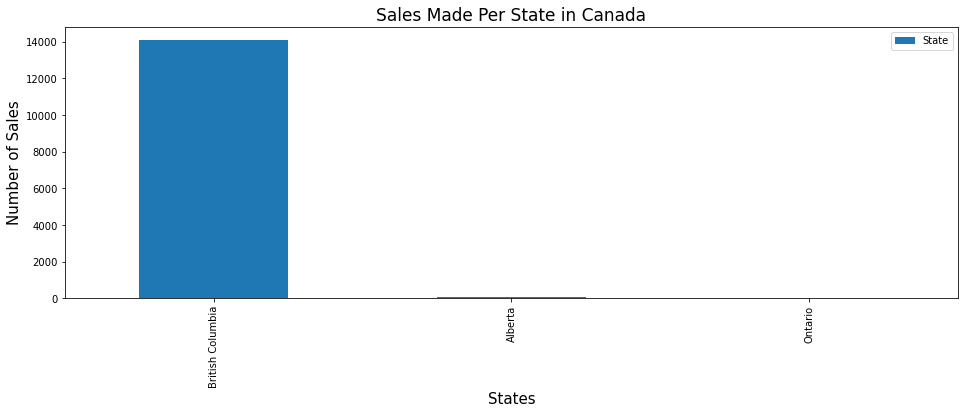

In [145]:
Sales.loc[Sales["Country"]=="Canada","State"].value_counts().plot(kind='bar',figsize=(16,5))
plt.title("Sales Made Per State in Canada",fontsize=17)
plt.ylabel("Number of Sales",fontsize=15)
plt.xlabel("States",fontsize=15)
plt.legend()

plt.legend()

In [146]:
Sales.loc[Sales["Country"]=="Germany","State"].value_counts()

Saarland               2770
Nordrhein-Westfalen    2484
Hessen                 2384
Hamburg                1836
Bayern                 1426
Brandenburg             198
Name: State, dtype: int64

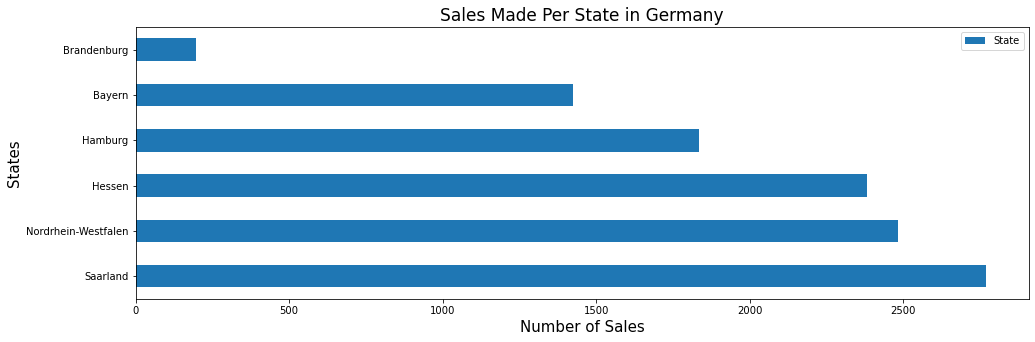

In [167]:
Sales.loc[Sales["Country"]=="Germany","State"].value_counts().plot(kind='barh',figsize=(16,5))
plt.title("Sales Made Per State in Germany",fontsize=17)
plt.ylabel("States",fontsize=15)
plt.xlabel("Number of Sales",fontsize=15)
plt.legend()

plt.legend()

In [148]:
df = Sales[['Country', 'Age_Group']]
df

,Country,Age_Group
0,Canada,Youth (<25)
1,Canada,Youth (<25)
2,Australia,Adults (35-64)
3,Australia,Adults (35-64)
4,Australia,Adults (35-64)
...,...,...
113031,United Kingdom,Adults (35-64)
113032,Australia,Youth (<25)
113033,Australia,Youth (<25)
113034,France,Adults (35-64)


## Germany data

In [149]:
df_germany = Sales.query("Country == 'Germany'")
df_germany

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
48,2013-08-07,7,August,2013,38,Adults (35-64),M,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,3,45,120,160,135,295,2013-08-07
49,2015-08-07,7,August,2015,38,Adults (35-64),M,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,53,45,98,2015-08-07
62,2013-09-25,25,September,2013,19,Youth (<25),F,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,6,45,120,320,270,590,2013-09-25
63,2015-09-25,25,September,2015,19,Youth (<25),F,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,427,360,787,2015-09-25
94,2013-09-23,23,September,2013,41,Adults (35-64),F,Germany,Hessen,Accessories,Bike Racks,Hitch Rack - 4-Bike,28,45,120,1865,1260,3125,2013-09-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113007,2016-03-28,28,March,2016,28,Young Adults (25-34),F,Germany,Saarland,Clothing,Vests,"Classic Vest, L",5,24,64,142,120,262,2016-03-28
113010,2014-04-10,10,April,2014,25,Young Adults (25-34),M,Germany,Hamburg,Clothing,Vests,"Classic Vest, S",28,24,64,995,672,1667,2014-04-10
113011,2016-04-10,10,April,2016,25,Young Adults (25-34),M,Germany,Hamburg,Clothing,Vests,"Classic Vest, S",28,24,64,995,672,1667,2016-04-10
113026,2013-07-08,8,July,2013,29,Young Adults (25-34),M,Germany,Hessen,Clothing,Vests,"Classic Vest, L",20,24,64,710,480,1190,2013-07-08


In [150]:
df_germany

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
48,2013-08-07,7,August,2013,38,Adults (35-64),M,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,3,45,120,160,135,295,2013-08-07
49,2015-08-07,7,August,2015,38,Adults (35-64),M,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,53,45,98,2015-08-07
62,2013-09-25,25,September,2013,19,Youth (<25),F,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,6,45,120,320,270,590,2013-09-25
63,2015-09-25,25,September,2015,19,Youth (<25),F,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,427,360,787,2015-09-25
94,2013-09-23,23,September,2013,41,Adults (35-64),F,Germany,Hessen,Accessories,Bike Racks,Hitch Rack - 4-Bike,28,45,120,1865,1260,3125,2013-09-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113007,2016-03-28,28,March,2016,28,Young Adults (25-34),F,Germany,Saarland,Clothing,Vests,"Classic Vest, L",5,24,64,142,120,262,2016-03-28
113010,2014-04-10,10,April,2014,25,Young Adults (25-34),M,Germany,Hamburg,Clothing,Vests,"Classic Vest, S",28,24,64,995,672,1667,2014-04-10
113011,2016-04-10,10,April,2016,25,Young Adults (25-34),M,Germany,Hamburg,Clothing,Vests,"Classic Vest, S",28,24,64,995,672,1667,2016-04-10
113026,2013-07-08,8,July,2013,29,Young Adults (25-34),M,Germany,Hessen,Clothing,Vests,"Classic Vest, L",20,24,64,710,480,1190,2013-07-08


Text(0.5, 0, 'Sales')

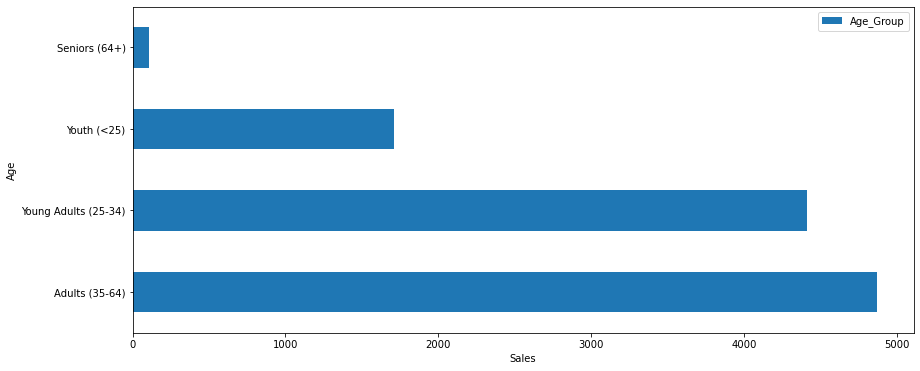

In [151]:
df_germany["Age_Group"].value_counts().plot(kind='barh',figsize=(14,6))
plt.legend()
plt.legend()
plt.ylabel("Age")
plt.xlabel("Sales")

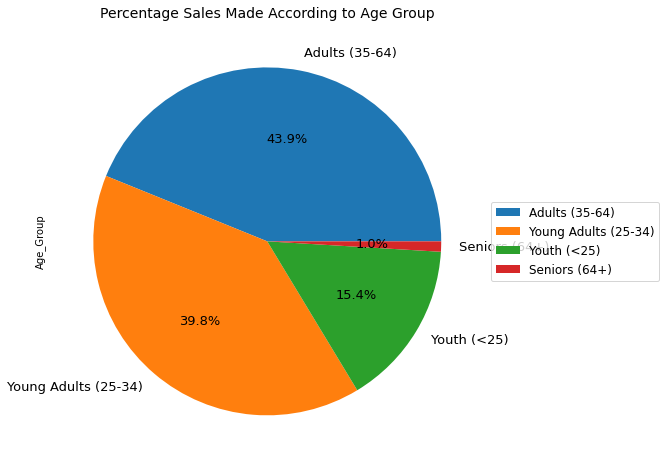

In [168]:
df_germany["Age_Group"].value_counts().plot(kind='pie',figsize=(14,8),autopct='%1.1f%%',fontsize=13)
plt.title("Percentage Sales Made According to Age Group",fontsize=14)
plt.legend(fontsize=12,loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

## sales made per category

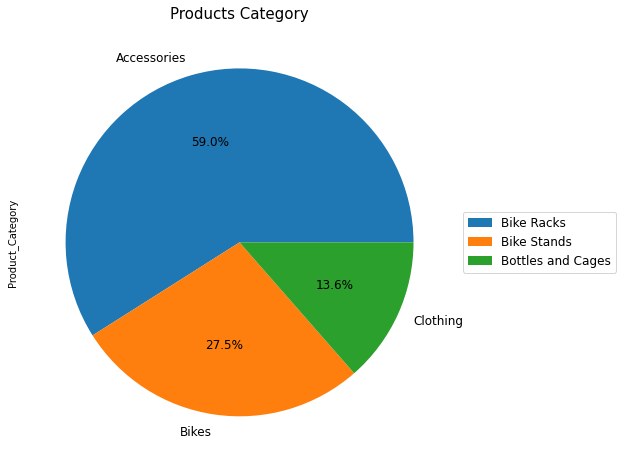

In [153]:
df_germany['Product_Category'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.1f%%',fontsize=12)
Cat= df_germany['Sub_Category'].unique()
plt.title("Products Category",fontsize=15)
plt.legend(Cat,fontsize=12,loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))


In [154]:
df_bicycle = df_germany.query("Product_Category =='Bikes'")

In [155]:
df_bicycle

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
49606,2012-04-17,17,April,2012,35,Adults (35-64),F,Germany,Nordrhein-Westfalen,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",2,1266,2320,1505,2532,4037,2012-04-17
49607,2011-04-17,17,April,2011,35,Adults (35-64),F,Germany,Nordrhein-Westfalen,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1,1266,2320,752,1266,2018,2011-04-17
49608,2013-07-10,10,July,2013,35,Adults (35-64),F,Germany,Nordrhein-Westfalen,Bikes,Mountain Bikes,"Mountain-100 Silver, 44",1,1912,3400,1046,1912,2958,2013-07-10
49609,2015-07-10,10,July,2015,35,Adults (35-64),F,Germany,Nordrhein-Westfalen,Bikes,Mountain Bikes,"Mountain-100 Silver, 44",1,1912,3400,1046,1912,2958,2015-07-10
49610,2012-04-25,25,April,2012,36,Adults (35-64),F,Germany,Bayern,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",2,1266,2320,2062,2532,4594,2012-04-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112025,2016-06-04,4,June,2016,32,Young Adults (25-34),M,Germany,Hamburg,Bikes,Touring Bikes,"Touring-3000 Yellow, 50",1,461,742,229,461,690,2016-06-04
112026,2014-06-27,27,June,2014,32,Young Adults (25-34),M,Germany,Hamburg,Bikes,Touring Bikes,"Touring-3000 Yellow, 50",1,461,742,229,461,690,2014-06-27
112027,2016-06-27,27,June,2016,32,Young Adults (25-34),M,Germany,Hamburg,Bikes,Touring Bikes,"Touring-3000 Yellow, 50",1,461,742,229,461,690,2016-06-27
112028,2014-06-25,25,June,2014,33,Young Adults (25-34),M,Germany,Hamburg,Bikes,Touring Bikes,"Touring-3000 Yellow, 50",1,461,742,229,461,690,2014-06-25


## Sales made per bicycle type

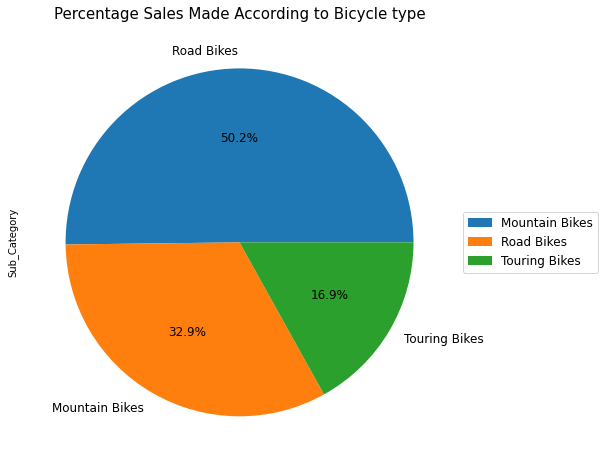

In [165]:
df_bicycle['Sub_Category'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.1f%%',fontsize=12)
Cat= df_bicycle['Sub_Category'].unique()
plt.title("Percentage Sales Made According to Bicycle type",fontsize=15)
plt.legend(Cat,fontsize=12,loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

> ### Sales evolve through the years

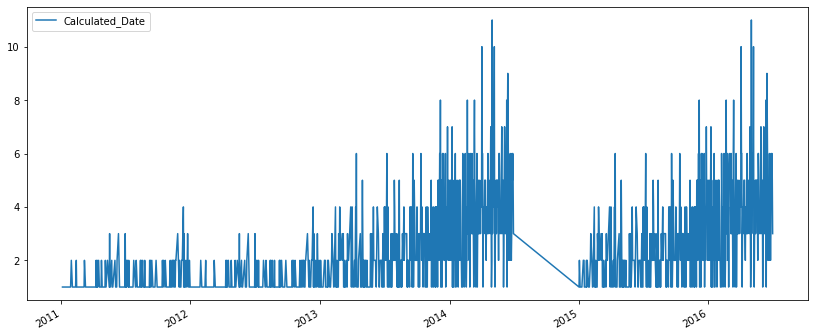

In [157]:
df_bicycle['Calculated_Date'].value_counts().plot(kind="line",figsize=(14,6))
plt.legend()